In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modern portfolio theory

A teoria moderna de portifolio é regida por quatro principios básicos. 

O primeiro se trata do Binômio Risco-retorno inicialmente estudado por Markowitz em 1952. O principio nos diz que **decisões de investimento devem ser tomadas com base na relação risco-retorno.**

O segundo principio foi estudado por James Tobin em 1958 e nos diz que a **alocação ótima de capital é uma combinação entre o atito livro de risco e o portifólio de mercado.**

Onde o ativo livro de risco é um conceito teórico de um ativo em que o seu retorno tem valor positivo e fixo, além disso possui risco zero associado. No mundo real esse ativo é representado pelos titulos de tesouro governamental. No Brasil, a Selic. 

O portifolio de mercado é um portifolio teórico composto por todos os ativos da economia. No mundo real o portifolio de mercado de cada investidor é composto por poucos ativos. 

O terceiro principio foi estudado por Sharpe e é o do retorno ajustado ao risco. Nos diz que o **portifólio ótimo é aquele que maximiza a relação entre o retorno em excesso e o risco do portifolio.**

Por ultimo, existe o axioma das preferências racionais. Onde a **alocação ótima de capital depende do seu apetite por risco e preferências associadas.**



### Fronteira eficiente

Para o caso de dois ativos com risco, existe uma fronteira que representa o relacionamento ótimo entre o retorno e o risco do portifolio. 

Considerando que r1 e r2 são os retornos de dois ativos com risco

$$ r_{i} \sim N ( \mu_{i}, \sigma_{i}^2) $$ 

Onde w1 e w2 são as frações investidas nos respectivos ativos.

$$ w_{1} + w_{2} = 1 \tag{1}$$

Logo, o retorno do portifolio é dado por

$$ r_{p} = w_{1}*r_{1} + w_{2}*r_{2} $$

$$ r_{p} \sim N(\mu_{p}, \sigma_{p}^2) $$

O calculo da média por:

$$ E[r_{p}] = w_{1}*E[r_{1}] + w_{2}*E[r_{2}] $$

$$ \mu_{p} = w_{1}*\mu_{1} + w_{2}*\mu_{2} \tag{2}$$

E o calculo da variância por:

$$ Var[r_{p}] = Var[w_{1}r_{1} + w_{2}r_{2}] $$

$$ Var[r_{p}] = Var[w_{1}r_{1}] + Var[w_{2}r_{2}] + 2Cov(w_{1}r_{1},w_{2}r_{2}) $$

$$ Var[r_{p}] = w_{1}^2Var[r_{1}] + w_{2}^2Var[r_{2}] + 2w_{1}w_{2}Cov(r_{1},r_{2}) $$

$$ \rho_{12} = \frac{Cov(r_{1}, r_{2})}{\sigma_{1}\sigma_{2}} \tag{3}$$

$$ \sigma_{p}^2 = w_{1}^2\sigma_{1}^2 + w_{2}^2\sigma_{2}^2 + 2w_{1}w_{2}\sigma_{1}\sigma_{2}\rho_{12} \tag{4}$$

Usando as equações (1) e (2), chega-se a:

$$ w_{1} = \frac{\mu_{p}-\mu_{2}}{\mu_{1}-\mu_{2}} \tag{5}$$
$$ w_{2} = \frac{\mu_{1}-\mu_{p}}{\mu_{1}-\mu_{2}} \tag{6}$$

Utilizando 4 e as ultimas 5 e 6 chega-se a uma equação que relaciona o retorno do portifolio e o desvio padrão.

Para o exercicio proposto, tem-se um portifolio composto de 3 ativos, 2 ativos de risco e um risk-free. Os dados são:

$$ r_{f} = 5\% a.a $$

$$ r_{1} \sim N(\mu_{1}, \sigma_{1}^2) $$

$$ r_{2} \sim N(\mu_{2}, \sigma_{2}^2) $$

Onde:
$ \mu_{1} = 12\% $, $ \sigma_{1}^2 = 9\% $,
$ \mu_{2} = 25\% $, $ \sigma_{2}^2 = 25\% $,
$ \rho = 0.25 $
e
$ \gamma = 2.85 $

In [2]:
#atribuição dos valores das variaveis
u1 = 0.12
var1 = 0.09

u2 = 0.25
var2 = 0.25

rho = 0.25

u = [u1, u2]

var = [var1, var2]

r_f = 0.05

risk_aversion = 2.85

In [3]:
#Defined by equations (5) and (6)

def weights_by_asset(u, u_p):
    w_1 = (u_p-u[1])/(u[0]-u[1])
    w_2 = (u[0]-u_p)/(u[0]-u[1])
    
    return w_1, w_2

#Defined by equation (4)

def variance_for_two_assets(w_1, w_2, var_1, var_2, rho):
    return (w_1**2)*var_1 + (w_2**2)*var_2 + 2*w_1*w_2*np.sqrt(var_1*var_2)*rho

# Construção da fronteira eficiente para os ativos de risco
# dado a correlação entre eles, variância e média de cada um
def efficient_frontier(u, var, rho):
    std = []
    var_1 = var[0]
    var_2 = var[1]
    upaxis = np.linspace(0, 0.3, 100)
    for u_p in upaxis:
        w_1, w_2 = weights_by_asset(u, u_p)
        std.append(np.sqrt(variance_for_two_assets(w_1, w_2, var_1, var_2, rho)))

    return np.array(std), upaxis.T

In [4]:
std_p, u_p = efficient_frontier(u, var, rho)

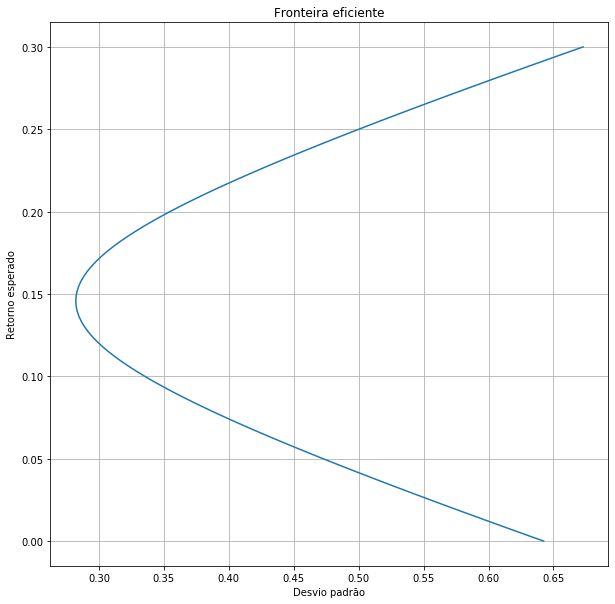

In [5]:
plt.figure(figsize=(10,10))
plt.title('Fronteira eficiente')
plt.plot(std_p, u_p)
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

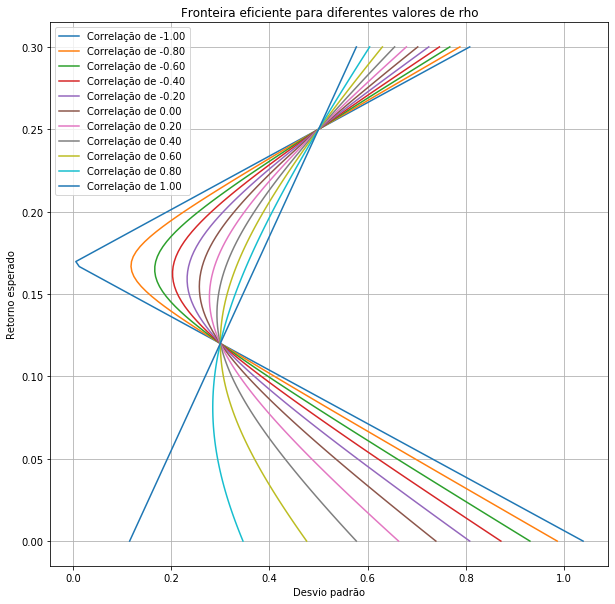

In [177]:
plt.figure(figsize=(10,10))
for rho_ in np.linspace(-1, 1, 11):
    std_p, u_p = efficient_frontier(u, var, rho_)
    plt.plot(std_p, u_p, label=f'Correlação de {rho_:.2f}')
plt.title('Fronteira eficiente para diferentes valores de rho')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.legend()
plt.grid()
plt.show()

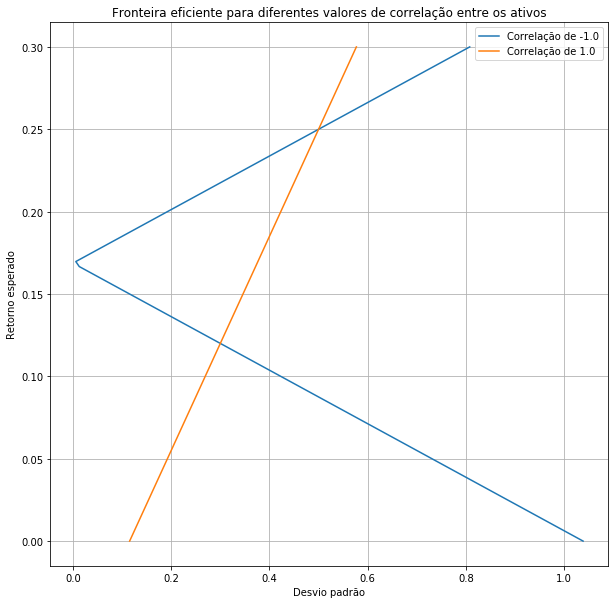

In [7]:
plt.figure(figsize=(10,10))
for rho_ in np.linspace(-1, 1, 2):
    std_p, u_p = efficient_frontier(u, var, rho_)
    plt.plot(std_p, u_p, label=f'Correlação de {rho_}')
plt.title('Fronteira eficiente para diferentes valores de correlação entre os ativos')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.legend()
plt.show()

Nota-se para os dois casos interessantes de correlação entre os dois ativos que:

Para os dois ativos totalmente correlacionados negativamente (rho = -1), o desvio padrão chega a zero trazendo um retorno positivo, ao mesmo tempo. 

Para o caso dos altivos perfeitamente correlacionados (rho = 1) não existe muita vantagem na diversificação, dado que a curva da fronteira eficiente se degenera numa unica reta. 

Nota-se que a medida que os dois ativos se tornam cada vez mais correlacionados negativamente (rho tendendo a -1), o desvio padrão do portifolio diminui, comprovando o principio da diversificação.

O portifolio de dois ativos de correlação -1 possui um retorno esperado para uma variância zero e que pode ser calculado assumindo $ \sigma_{p} = 0 $ na equação (4). Fazer as devidas substituições com a equação (5) e (6), que nos leva a:

$$ \mu_{p} = \frac{\mu_{1}*\sigma_{2} + \mu_{2}*\sigma_{2}}{\sigma_{1}+\sigma_{2}} \tag{7}$$

**Esse portifolio é conhecido como portifolio de risco zero**. 

Seguindo na linha em que um portifolio que traga um retorno positivo com menor risco possivel associado a ele seja o que um gestor de investimentos busca. O portifolio em questão pode ser encontrado através da fronteira eficiente também.

Basta fazer:
$$ min( \sigma_{p}^2) =  d(\sigma_{p}^2)/d(\mu) = 0 $$

O que nos dá:

$$ \mu_{p}^* = \frac{\mu_{1}\sigma_{2}^2 + \mu_{2}\sigma_{1}^2 - (\mu_{1}+\mu_{2})\sigma_{1}\sigma_{2}\rho_{12}}{\sigma_{1}^2+\sigma_{2}^2-2\sigma_{1}\sigma_{2}\rho_{12}} \tag{8}$$ 

**Esse portifolio é conhecido como portifolio de variância minima.** Cuja alocação ótima é dada por:

$$ w_{1}^* = \frac{\mu_{p}^*-\mu_{2}}{\mu_{1}-\mu_{2}} \tag{9}$$

$$ w_{2}^* = \frac{\mu_{1}-\mu_{p}^*}{\mu_{1}-\mu_{2}} \tag{10}$$

É imoportante lembrar que o portifolio de variância minima:

- representa o inicio da fronteira eficiente
- representa o portifolio de menor risco
- não tem nenhuma relação com a taxa livre de risco
- não depende das preferências de risco do investidor

In [8]:
def u_for_minimal_variance_risk_portfolio(u, var, rho):
    numerator = u[0]*var[1]+u[1]*var[0] - (u[0]+u[1])*np.sqrt(var[0]*var[1])*rho
    denominator = var[0] + var[1] - 2*np.sqrt(var[0]*var[1])*rho
    
    optimal_u = numerator/denominator

    return optimal_u

In [9]:
u_for_minimal_variance_risk_portfolio(u, var, rho)

0.1457547169811321

In [10]:
def minimal_variance(u, var, rho):
    u_p = u_for_minimal_variance_risk_portfolio(u, var, rho)
    w_1, w_2 = weights_by_asset(u, u_p)
    var_p = variance_for_two_assets(w_1, w_2, var[0], var[1], rho)
    return var_p


In [12]:
minimal_variance(u, var, rho)

0.07959905660377359

**Indice de Sharpe mede o excedente de retorno em relação ao ativo livre de risco em por unidade de risco assumido no portifolio.**

$$ Sharpe = \frac{\mu_{p}-r_{f}}{\sigma_{p}} \tag{11}$$

É uma métrica bastante utilizada para comparar a performance entre portifolios. Vale a pena notar também que o portifolio de variância minima também tem o menor indice de Sharpe, que não necessariamente é o ideal ou que buscamos. 

O que se deseja é a maximização do indice de Sharpe pois isso significa um retorno excedente sobre a taxa livre de risco que é maximo para um risco minimo. 

Para calcular o indice de Sharpe ótimo (o maior possivel) resolve-se a equação abaixo. **O portifolio de ativos de risco construido a partir do maior indice de Sharpe é chamado de portifolio tangente.**

$$ max(S_{p}) = \frac{d}{d\mu_{p}}(\frac{\mu_{p}-r_{f}}{\sigma_{p}}) = 0 $$

A solução fica de exercicio para o leitor.

É importante lembrar que o portifolio tangente:
- Representa o portifolio ótimo (segundo Sharpe) dos ativos com risco
- Depende da taxa livre de risco
- Não depende das preferências de risco do investidor

In [13]:
def u_for_maximum_sharpe(u, var, rho, r_f):
    difference_between_u = (u[0]-u[1])**2
    beta_parabola = -2*(u[0]*var[1]+u[1]*var[0] - (u[0]+u[1])*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    alpha_parabola = (var[0] + var[1] - 2*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    gamma_parabola = ((u[0]**2)*var[1]+(u[1]**2)*var[0] - 2*(u[0]*u[1])*np.sqrt(var[0]*var[1])*rho)/difference_between_u
    optimal_u = -(beta_parabola*r_f + 2*gamma_parabola)/(2*alpha_parabola*r_f+beta_parabola)
    
    return optimal_u

In [14]:
u_for_maximum_sharpe(u, var, rho, 0.05)

0.19876847290640395

In [15]:
def variance_for_maximum_sharpe(u, var, rho, r_f):
    u_p = u_for_maximum_sharpe(u, var, rho, r_f)
    w_1, w_2 = weights_by_asset(u, u_p)
    var_p = variance_for_two_assets(w_1, w_2, var[0], var[1], rho)
    return var_p

In [16]:
variance_for_maximum_sharpe(u, var, rho, 0.05)

0.12366837341357474

No mundo real, a alocação otima de capital depende do perfil de risco do investidor. Portanto, **o portifolio geral do investidor é composto por apenas dois ativos: o ativo livre de risco e o portifolio tangente.** A linha de alocação de capital (LAC) é a fronteira eficiente para o portifolio geral do investidor. 

Pelo principio 4 e teoria das preferências (microeconomia), o perfil de risco do investidor pode ser modelado pela teoria da utilidade U(x) que simboliza a utilidade fornecida por um retorno, variancia e um parametro de aversão a risco.

A função de utilidade quadratica abaixo é a mais utilizada:

$$ U = \mu_{g} - \frac{1}{2}\gamma\sigma_{g}^2 \tag{12} $$

Onde $ \gamma $ é o coeficiente de aversão a risco do investidor e possui um valor tipico de 2.85

In [17]:
def get_sharpe_ratio(u, var, r_f):
    return (u - r_f) / np.sqrt(var)

def get_max_sharpe_ratio(u, var, rho, r_f):
    u_p = u_for_minimal_variance(u, var, rho, r_f)
    var_p = minimal_variance(u, var, rho, r_f)
    
    return get_sharpe_ratio(u_p, var_p, r_f)

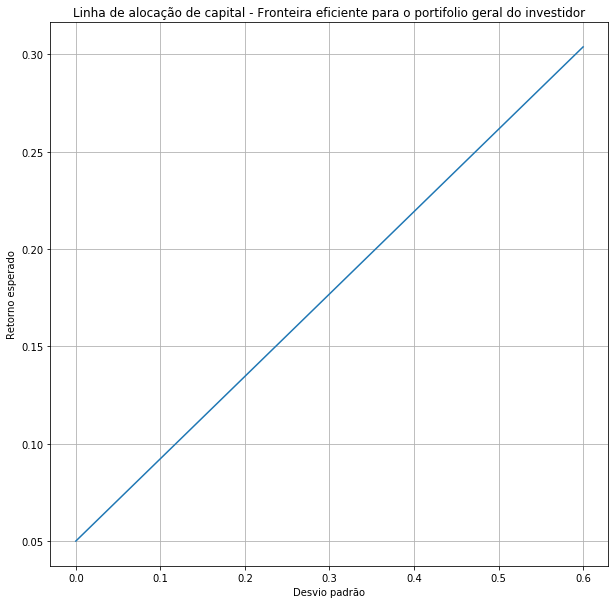

In [20]:
plt.figure(figsize=(10,10))
u_lac = []
std_axis = []
u_p = u_for_maximum_sharpe(u, var, rho, r_f)
var_p = variance_for_maximum_sharpe(u, var, rho, r_f)
for std_ in np.linspace(0, 0.6, 200):
    std_axis.append(std_)
    a = (u_p - r_f)/np.sqrt(var_p)
    u_lac.append(a*std_+r_f)
    lac = std_axis, u_lac
plt.plot(lac[0], lac[1])
plt.title('Linha de alocação de capital - Fronteira eficiente para o portifolio geral do investidor')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

In [21]:
def quadratic_utility_function(u, var, gamma):
    
    return u - (1/2)*gamma*var

In [22]:
lac_df = pd.concat([pd.DataFrame(lac[0], columns=['std']), pd.DataFrame(lac[1], columns=['u'])], axis=1)
lac_df['utility'] = (lac_df.apply(lambda x: quadratic_utility_function(x['u'], x['std']**2, risk_aversion), axis=1))
max_utility = lac_df.utility.max()
lac_df[lac_df.utility==max_utility]

,std,u,utility
49,0.147739,0.112499,0.081396


In [23]:
print(f'A curva que nos dá a maior utilidade é dada pela utilidade: {max_utility}')

A curva que nos dá a maior utilidade é dada pela utilidade: 0.08139631987117875


In [24]:
def inverse_quadratic_utility_function(max_utility, var, gamma):
    return max_utility + (1/2)*gamma*var

Metodo formal para obter o portifolio que maximiza a utilidade.

$$ r_{g} = yr_{p} + (1-y)r_{f} $$

**Calculo da média:**

$$ r_{g} = yr_{p} + (1-y)r_{f} $$

$$ E[r_{g}] = yE[r_{p}] + (1-y)r_{f} $$

$$ \mu_{g} = y\mu_{p} + (1-y)r_{f} \tag{13}$$

**Calculo da variancia:**

$$ Var[r_{g}] = Var[yr_{p}] + Var[(1-y)r_{f}] + 2Cov[yr_{p}, (1-y)r_{f}] $$

$$ Var[r_{g}] = y^2Var[r_{p}] $$

$$ \sigma^2_{g} = y^2\sigma_{p}^2 \tag{14}$$ 

Para obter a composição $y$ do portifolio ótimo que maximixa o Sharpe

$$ y^* = \frac{1}{\gamma}\frac{S_{p}}{\sigma_{p}} \tag{15}$$

In [25]:
def get_risk_asset_composition_pgi(u, var, rho, r_f, gamma):
    """encontra a composição percentual do portifolio 
    de risco dentro do portifolio geral do investidor"""
    
    s_p = get_max_sharpe_ratio(u, var, rho, r_f)
    var_p = minimal_variance(u, var, rho, r_f)
    
    y = (1 / gamma) * (s_p / np.sqrt(var_p))
    
    return y
    

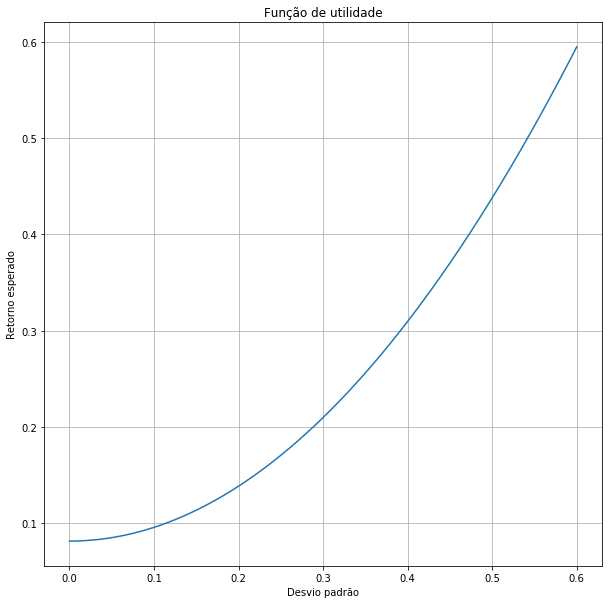

In [26]:
plt.figure(figsize=(10,10))
u_preference = []
std_axis = []
for std_ in np.linspace(0, 0.6, 200):
    std_axis.append(std_)
    u_preference.append(inverse_quadratic_utility_function(max_utility, std_**2, risk_aversion))
plt.plot(std_axis, u_preference)
plt.title('Função de utilidade')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

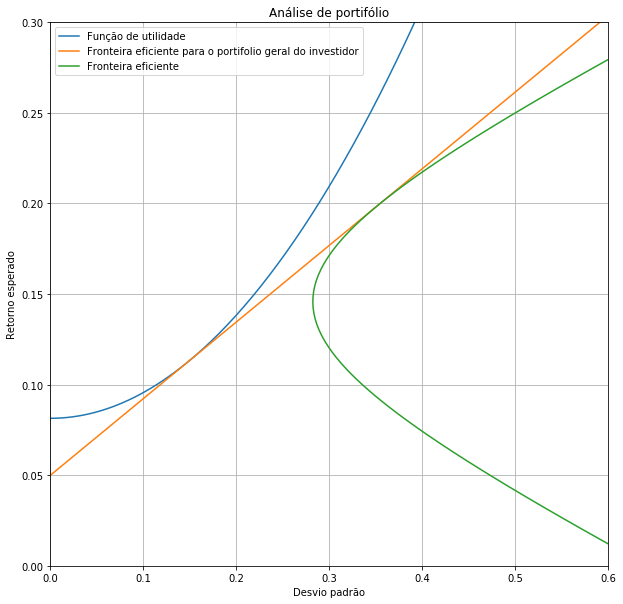

In [27]:
plt.figure(figsize=(10,10))
plt.plot(std_axis, u_preference, label='Função de utilidade')
plt.plot(lac[0], lac[1], label='Fronteira eficiente para o portifolio geral do investidor')
std_p, u_p = efficient_frontier(u, var, rho)
plt.plot(std_p, u_p, label='Fronteira eficiente')
plt.xlim([0, 0.6])
plt.ylim([0, 0.3])
plt.legend()
plt.title('Análise de portifólio')
plt.xlabel('Desvio padrão')
plt.ylabel('Retorno esperado')
plt.grid()
plt.show()

Em teoria, o portifolio geral do investidor poderia ser construido combinando o ativo livre de risco e o portifolio de mercado. Dessa forma, o investidor não teria a necessidade de construir um portifolio tangente, simplificando o trabalho.

Assim, o retorno de qualquer portifolio localizado na linha de mercado de capitais pode ser calculado através de:

$$ E[r_{p}] = r_{f} + \frac{\sigma_{g}}{\sigma_{m}}(E[r_{m}]-r_{f}) \tag{16} $$

Quando o portifolio tangente é o proprio portifolio de mercado, então a linha de alocação de capitais converge para a linha de mercado de capitais. 

No modelo CAPM, William Sharpe propos um modelo geral para a avaliação do retorno de qualquer portifolio (eficiente ou não) ou de um ativo.

$$ E[r_{i}] = r_{f} + \beta_{i}(E[r_{m}]-r_{f}) \tag{17} $$

Onde,

$$ \beta_{i} = \frac{Cov[r_{i}, r_{m}]}{Var[r_{m}]} \tag{18} $$

**Para o caso de um portifolio:**

$$ \beta_{p} = \sum_{i=1}^{m}{w_{i}\beta_{i}} \tag{19}$$

$$ \mu_{p} = r_{f} + \beta_{p}[\mu_{m}-r_{f}] \tag{20}$$

In [28]:
import yfinance as yf

In [29]:
class PortfolioData():
    
    def __init__(self, tickers):
        self.bench_ticker = 'BOVA11'
        self.tickers = tickers
        self.returns = self.historicalReturn(self.tickers+[self.bench_ticker])
        
    def historicalReturn(self, tickers):
        prices = yf.download([f'{stock}.SA' for stock in tickers], start='2019-01-01', group_by='column')[['Close']]
        returns = prices.pct_change().fillna(0)
        returns.columns=tickers
        
        return returns 


In [53]:
class VanillaPortfolioData():
    
    def __init__(self, u, var, rho):
        self.u = u
        self.var = var
        self.std = [np.sqrt(v) for v in self.var]
        self.rho = rho

In [316]:
class PortfolioOptmizer():
    
    def __init__(self, portfolio, r_f, gamma):
        self.portfolio = portfolio
        self.u = self.portfolio.u
        self.var = self.portfolio.var
        self.std = self.portfolio.std
        self.rho = self.portfolio.rho
        self.r_f = r_f
        self.gamma = gamma
        self.load_params()
        
    def weights_by_asset(self, u_p):
        w_1 = (u_p-self.u[1])/(self.u[0]-self.u[1])
        w_2 = (self.u[0]-u_p)/(self.u[0]-self.u[1])

        return w_1, w_2
    
    def variance_for_two_assets(self, w_1, w_2):
        return (w_1**2)*self.var[0] + (w_2**2)*self.var[1] + 2*w_1*w_2*np.sqrt(self.var[0]*self.var[1])*self.rho

    def efficient_frontier(self):
        std = []
        var_1 = self.var[0]
        var_2 = self.var[1]
        upaxis = np.linspace(0, np.sum(self.var), 100)
        frontier = {}
        for u_p in upaxis:
            w_1, w_2 = self.weights_by_asset(u_p)
            frontier[u_p] = np.sqrt(self.variance_for_two_assets(w_1, w_2))

        return frontier
    
    def _u_for_minimal_variance_risk_portfolio(self):
        numerator = self.u[0]*self.var[1]+self.u[1]*self.var[0] - (self.u[0]+self.u[1])*np.sqrt(self.var[0]*self.var[1])*self.rho
        denominator = self.var[0] + self.var[1] - 2*np.sqrt(self.var[0]*self.var[1])*self.rho

        self.u_for_minimal_variance_risk_portfolio = numerator/denominator
        
    def _minimal_variance_risk_portfolio(self):
        var_p = self.variance_for_two_assets(self.w_1_minimal_variance, self.w_2_minimal_variance)
        self.minimal_variance_risk_portfolio = var_p
        
    def _weights_for_minimal_variance(self):
        self.w_1_minimal_variance, self.w_2_minimal_variance = self.weights_by_asset(self.u_for_minimal_variance_risk_portfolio)
    
    def _u_for_maximum_sharpe(self):
        difference_between_u = (self.u[0]-self.u[1])**2
        beta_parabola = -2*(self.u[0]*self.var[1]+self.u[1]*self.var[0] - (self.u[0]+self.u[1])*np.sqrt(self.var[0]*self.var[1])*self.rho)/difference_between_u
        alpha_parabola = (self.var[0] + self.var[1] - 2*np.sqrt(self.var[0]*self.var[1])*self.rho)/difference_between_u
        gamma_parabola = ((self.u[0]**2)*self.var[1]+(self.u[1]**2)*self.var[0] - 2*(self.u[0]*self.u[1])*np.sqrt(self.var[0]*self.var[1])*self.rho)/difference_between_u
        self.u_for_maximum_sharpe = -(beta_parabola*self.r_f + 2*gamma_parabola)/(2*alpha_parabola*self.r_f+beta_parabola)
    
    def _weights_for_maximum_sharpe(self):
        u_p = self.u_for_maximum_sharpe
        self.w_1_max_sharpe, self.w_2_max_sharpe = self.weights_by_asset(u_p)
        
    def _variance_for_maximum_sharpe(self):
        self.variance_for_maximum_sharpe = self.variance_for_two_assets(self.w_1_max_sharpe, self.w_2_max_sharpe)
    
    def sharpe_ratio(self, u, var, r_f):
        return (u - r_f) / np.sqrt(var)

    def _max_sharpe_ratio(self):
        u_p = self.u_for_maximum_sharpe
        var_p = self.variance_for_maximum_sharpe
    
        self.max_sharpe_ratio = self.sharpe_ratio(u_p, var_p, self.r_f)
    
    def _risk_asset_composition_pgi(self):
        s_p = self.max_sharpe_ratio
        var_p = self.variance_for_maximum_sharpe

        self.risk_asset_composition_pgi = (1 / self.gamma) * (s_p / np.sqrt(var_p))
        
    def _weights_for_pgi(self):
        self.w1_pgi = self.w_1_max_sharpe * self.risk_asset_composition_pgi
        self.w2_pgi = self.w_2_max_sharpe * self.risk_asset_composition_pgi
        self.w_rf_pgi = 1-self.risk_asset_composition_pgi
        
        
    def _u_for_pgi(self):
        self.u_pgi = self.risk_asset_composition_pgi*self.u_for_maximum_sharpe+(1-self.risk_asset_composition_pgi)*self.r_f
        
    def _var_for_pgi(self):
        self.var_pgi = (self.risk_asset_composition_pgi**2)*self.variance_for_maximum_sharpe
        
    def _max_utility(self):
        self.max_utility = self.quadratic_utility_function(self.u_pgi, self.var_pgi, self.gamma)
        
    def _generate_lac(self):
        u_lac = []
        std_axis = []
        u_p = self.u_for_maximum_sharpe
        var_p = self.variance_for_maximum_sharpe
        for std_ in np.linspace(0, 2*np.sum(self.var), 300):
            std_axis.append(std_)
            a = (u_p - self.r_f)/np.sqrt(var_p)
            u_lac.append(a*std_+r_f)
        return std_axis, u_lac
        
    def _generate_utility_curve(self):
        u_preference = []
        std_axis = []
        for std_ in np.linspace(0, 2*np.sum(self.var), 300):
            std_axis.append(std_)
            u_preference.append(self.inverse_quadratic_utility_function(self.max_utility, std_**2, self.gamma))
        
        return std_axis, u_preference
    
    def load_params(self):
        self._u_for_minimal_variance_risk_portfolio()
        self._weights_for_minimal_variance()
        self._minimal_variance_risk_portfolio()
        self._u_for_maximum_sharpe()
        self._weights_for_maximum_sharpe()
        self._variance_for_maximum_sharpe()
        self._max_sharpe_ratio()
        self._risk_asset_composition_pgi()
        self._u_for_pgi()
        self._var_for_pgi()
        self._weights_for_pgi()
        self._max_utility()
    
    def quadratic_utility_function(self, u, var, gamma):
        return u - (1/2)*gamma*var

    def inverse_quadratic_utility_function(self, utility, var, gamma):
        return utility + (1/2)*gamma*var
    
    def plot_efficient_frontier(self):
        plt.figure(figsize=(10,10))
        frontier = self.efficient_frontier()
        plt.plot([v for v in frontier.values()], [k for k in frontier.keys()])
        plt.title('Fronteira eficiente')
        plt.xlabel('Desvio padrão')
        plt.ylabel('Retorno esperado')
        plt.grid()
        plt.show()
    
    def plot_lac(self):
        lac = self._generate_lac()
        plt.figure(figsize=(10,10))
        plt.plot(lac[0], lac[1])
        plt.title('Linha de alocação de capital - Fronteira eficiente para o portifolio geral do investidor')
        plt.xlabel('Desvio padrão')
        plt.ylabel('Retorno esperado')
        plt.grid()
        plt.show()
    
    def plot_utility_function_for_max_utility(self):
        std_axis, u_preference = self._generate_utility_curve()
        plt.figure(figsize=(10,10))
        plt.plot(std_axis, u_preference)
        plt.title('Função de utilidade')
        plt.xlabel('Desvio padrão')
        plt.ylabel('Retorno esperado')
        plt.grid()
        plt.show()
        
    def plot_curves(self):
        frontier = self.efficient_frontier()
        std_axis, u_preference = self._generate_utility_curve()
        lac = self._generate_lac()
        plt.figure(figsize=(14,14))
        plt.plot(std_axis, u_preference, label='Função de utilidade')
        plt.plot(lac[0], lac[1], label='Fronteira eficiente para o portifolio geral do investidor')
        plt.plot([v for v in frontier.values()], [k for k in frontier.keys()], label='Fronteira eficiente')
        plt.scatter(np.sqrt(self.var_pgi), self.u_pgi, marker='^', s=300, label='Portfolio geral do investidor')
        plt.scatter(np.sqrt(self.variance_for_maximum_sharpe), self.u_for_maximum_sharpe, marker='^', s=300, label='Portfolio de Sharpe máximo')
        plt.text(0.5*np.sqrt(self.var_pgi), 1.1*self.u_pgi, f'Risk-free asset weight: {self.w_rf_pgi:.2f} \nAsset 1 weight: {self.w1_pgi:.2f} \nAsset 2 weight: {self.w2_pgi:.2f}')
        plt.text(1.05*np.sqrt(self.variance_for_maximum_sharpe), 0.9*self.u_for_maximum_sharpe, f'Asset 1 weight: {self.w_1_max_sharpe:.2f} \nAsset 2 weight: {self.w_2_max_sharpe:.2f}')
        plt.legend()
        plt.title('Análise de portifólio')
        plt.xlabel('Desvio padrão')
        plt.ylabel('Retorno esperado')
        plt.xlim([0, 5*self.variance_for_maximum_sharpe])
        plt.ylim([0, 2*self.u_for_maximum_sharpe])
        plt.grid()
        plt.show()
    
    def set_u(self, u):
        self.u = u
        self.load_params()
        print(f'New mu parameters set to {self.u}')
    
    def set_var(self, var):
        self.var = var
        self.std = [np.sqrt(v) for v in self.var]
        self.load_params()
        print(f'New variance parameters set to {self.var}')
    
    def set_std(self, std):
        self.std = std
        self.var = [252*(s**2) for s in self.std]
        self.load_params()
        print(f'New standart deviation parameters set to {self.std}')
        
    def set_r_f(self, r_f):
        self.r_f = r_f
        self.load_params()
        print(f'New risk-free rate parameter set to {self.r_f}')
        
    def set_rho(self, rho):
        self.rho = rho
        self.load_params()
        print(f'New correlation parameter set to {self.rho}')
        
    def set_gamma(self, gamma):
        self.gamma = gamma
        self.load_params()
        print(f'New risk-aversion parameter set to {self.gamma}')
        

        

In [317]:
portfolio = VanillaPortfolioData(u, var, rho)

portfolio.__dict__

{'u': [0.12, 0.25], 'var': [0.09, 0.25], 'std': [0.3, 0.5], 'rho': 0.25}

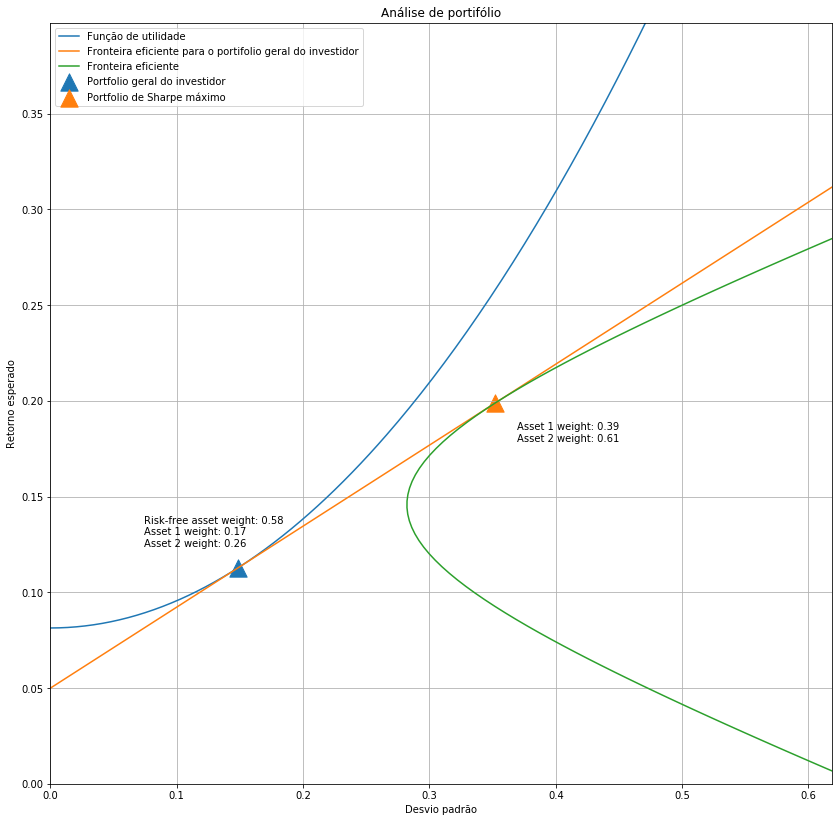

{'portfolio': <__main__.VanillaPortfolioData at 0xc2d7250>,
 'u': [0.12, 0.25],
 'var': [0.09, 0.25],
 'std': [0.3, 0.5],
 'rho': 0.25,
 'r_f': 0.05,
 'gamma': 2.85,
 'u_for_minimal_variance_risk_portfolio': 0.1457547169811321,
 'w_1_minimal_variance': 0.80188679245283,
 'w_2_minimal_variance': 0.19811320754717002,
 'minimal_variance_risk_portfolio': 0.07959905660377359,
 'u_for_maximum_sharpe': 0.19876847290640395,
 'w_1_max_sharpe': 0.3940886699507388,
 'w_2_max_sharpe': 0.6059113300492612,
 'variance_for_maximum_sharpe': 0.12366837341357474,
 'max_sharpe_ratio': 0.42304014344145036,
 'risk_asset_composition_pgi': 0.42209226770630265,
 'u_pgi': 0.11279402209226769,
 'var_pgi': 0.022032990207813224,
 'w1_pgi': 0.166341780376868,
 'w2_pgi': 0.2557504873294347,
 'w_rf_pgi': 0.5779077322936974,
 'max_utility': 0.08139701104613384}

In [318]:
port_opt = PortfolioOptmizer(portfolio, 0.05, 2.85)

port_opt.plot_curves()

port_opt.__dict__

In [319]:
data = PortfolioData(['VALE3', 'SUZB3'])

u_portf = data.returns.mean().tolist()
var_portf = data.returns.var().tolist()
rho_portf = np.array(data.returns.corr())[0][1]
online_portfolio = VanillaPortfolioData([252*u for u in u_portf], [252*v for v in var_portf], rho_portf)

[*********************100%***********************]  3 of 3 completed


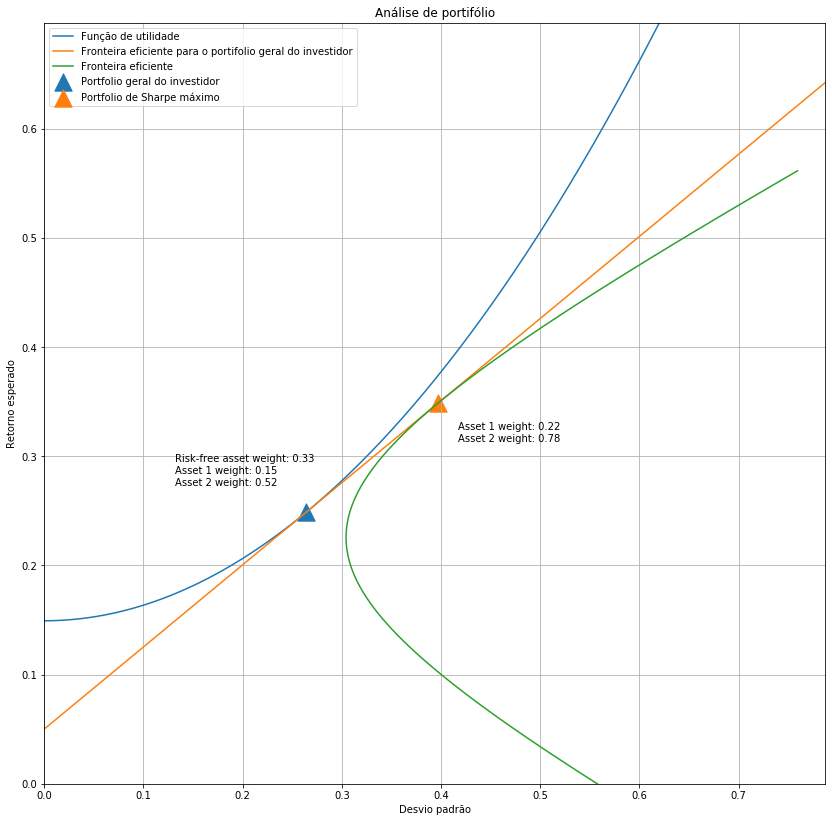

{'portfolio': <__main__.VanillaPortfolioData at 0xc4bf10>,
 'u': [0.1603877842981291, 0.4014276439079707, 0.4010335365803345],
 'var': [0.1108553066311216, 0.22513377927770756, 0.22558264857695498],
 'std': [0.33294940551249164, 0.47448264381082217, 0.47495541746247616],
 'rho': 0.274919465187837,
 'r_f': 0.05,
 'gamma': 2.85,
 'u_for_minimal_variance_risk_portfolio': 0.22562315807020497,
 'w_1_minimal_variance': 0.7293585638588203,
 'w_2_minimal_variance': 0.2706414361411797,
 'minimal_variance_risk_portfolio': 0.092607610101207,
 'u_for_maximum_sharpe': 0.3485999486071874,
 'w_1_max_sharpe': 0.21916580679350162,
 'w_2_max_sharpe': 0.7808341932064984,
 'variance_for_maximum_sharpe': 0.15745433529785857,
 'max_sharpe_ratio': 0.7525102453991379,
 'risk_asset_composition_pgi': 0.6654114133713568,
 'u_pgi': 0.24869181383532307,
 'var_pgi': 0.06971642590713091,
 'w1_pgi': 0.14583542926113763,
 'w2_pgi': 0.5195759841102192,
 'w_rf_pgi': 0.3345885866286432,
 'max_utility': 0.1493459069176615

In [320]:
port_opt = PortfolioOptmizer(online_portfolio, 0.05, 2.85)

port_opt.plot_curves()

port_opt.__dict__